<div style="border:solid purple 2px; padding: 20px"> 

Юлия привет! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью проектной работы по статистическому анализу данных. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Цель моей работы — не указать на ошибки, а поделиться опытом, и помочь сделать проект еще лучше, чтобы повалить всех своим решением 😁 Комментарии в работе позволят тебе расставить приоритеты.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил в фиолетовую рамку)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

---

У тебя получилась отличная работа! Ты отлично визуализируешь распределения, чтобы понять, как ведут себя данные. У тебя аккуратный и понятный код 💪 Мне понравился твой очень вдумчивый подход к работе

Как ни старался, критичных проблем я не нашел, ты точно готова идти дальше. Успехов в дальнейшем прохождении курса! 😊

![](https://i.gifer.com/7V3.gif)

</div>

# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
**Тариф «Смарт»**
 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
**Тариф «Ультра»**
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
                    
**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.                   

**Цель исследования**:
Выбрать наиболее прибыльный тариф

**Ход исследования**
 1. Изучение данных из файла
 2. Предобработка данных
 3. Расчёты и добавление результатов в таблиц
 4. Исследовательский анализ данных
 5. Проверка гипотез
 6. Общий вывод

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

In [3]:
# импорт библиотеки numpy
import numpy as np

In [4]:
# импорт stats из библиотеки scipy
from scipy import stats as st

In [5]:
# чтение файлов и сохранение в переменные
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Описание таблицы calls

Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [6]:
# просмотр первых 10 строк таблицы
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
# получение общей информации о таблице
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Пайплан первичной обработки можно усилить добавив [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) 

В таблице четыре столбца. В столбцах встречается 3 типа данных:
* `int64` (1 столбец);
* `float64` (1 столбец);
* `object` (2 столбца).
Пропусков в таблице нет. Так как «Мегалайн» всегда округляет секунды до минут, то надо поменять тип данных в 'duration' на *int*.
А в `call_date` - на тип datetime.

In [8]:
# проверка на дубликаты
calls.duplicated().sum()

0

### Описание таблицы internet

Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [9]:
# просмотр первых 10 строк таблицы
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
# получение общей информации о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице пять столбцов. В столбцах встречается 3 типа данных:
* `int64` (2 столбца);
* `float64` (1 столбец);
* `object` (2 столбца).
Пропусков в таблице нет. Так как «Мегалайн» всегда округляет мегабайты до гигабайт за месяц, то надо создать новый столбец со значениями в гигабайтах. А в `session_date` - на тип datetime. В датасете есть столбец `Unnamed: 0`, дублирующий порядковые номера строк. Его надо удалить. 

In [11]:
# проверка на дубликаты
internet.duplicated().sum()

0

### Описание таблицы messages

Таблица messages (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [12]:
# просмотр первых 10 строк таблицы
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
# получение общей информации о таблице
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца. В столбцах встречается 2 типа данных:
* `int64` (1 столбец);
* `object` (2 столбца).
Пропусков в таблице нет. В `message_date` тип надо сменить на datetime.

In [14]:
# проверка на дубликаты
messages.duplicated().sum()

0

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> PEP 8 - руководство по написанию кода на Python  <a class="tocSkip"> </h3>

В python есть своя философия. Именно отсюда берутся определенные правила и стандарты. В пайтон такое соглашение назвали PEP 8. PEP 8 создан на основе рекомендаций Гуидо ван Россума (создатель языка Python) с добавлениями от Барри Уорсо (соратник).

Единый стиль оформления делает код понятным для самого программиста и его коллег с разным уровнем подготовки. В идеале наиболее сложный фрагмент кода должен быть понятен с первого прочтения. Это упрощает командную разработку и обучение новичков, позволяет вам быстро возвращаться к собственным давним проектам.

Каждый уважающий себя питонист обязан знать этот стандарт. Читайте [оригинал](https://www.python.org/dev/peps/pep-0008/) или [перевод](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), главное  —  вдумчиво!

Когда проект небольшой, несложно следить за качеством кода, но вот когда проект принимает маштабы ... часто это становиться проблемой. В этом случае выручат скрипты автоматической проверки кода. Кстати, PyCharm проверяет написанное «на лету». А если вы привыкли работать в Jupyter, то на GitHub есть целый раздел [Python Code Quality Authority](https://github.com/PyCQA/), где хранятся утилиты для повышения качества кода, в том числе для проверки стиля на соответствие PEP 8: flake8, pycodestyle, pep8-naming.

![](https://i.ibb.co/Gv0PvHQ/mini-magick20171220-84-vtyy26.png)

### Описание таблицы tariffs

Таблица tariffs (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [15]:
# просмотр первых 10 строк таблицы
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
# получение общей информации о таблице
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице восемь столбцов. В столбцах встречается 2 типа данных:
* `int64` (2 столбца);
* `object` (2 столбца).
Эта таблица содержит характеристики тарифов. В ней ничего менять не надо.

### Описание таблицы users

Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

In [17]:
# просмотр первых 10 строк таблицы
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
# получение общей информации о таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице восемь столбцов. В столбцах встречается 2 типа данных:
* `int64` (2 столбца);
* `object` (2 столбца).
Есть пропуски в столбце `churn_date`. В `reg_date` надо заменить тип данных на datetime.

In [19]:
# проверка на дубликаты
users.duplicated().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Для каждой таблицы ты принимаешь одни и те же методы, почему бы не написать под это дело функцию и не использовать цикл для датарфеймов?)

### Вывод

Данные в таблицах выглядят удобными для проведения дальнейшего анализа. Надо только провести следующую предобработку отдельных столбцов:
* замена типов данных в столбцах с датой на тип данных datetime;
* округление секунд до минут;
* округление мегабайт до целых чисел;
* удаление столбца, дублирующего порядковые номера строк датафрейма и столбца, имеющего пропуски.
Столбец `churn_date` из таблицы `users` можно удалить. Маловероятно что он потребуется для анализа и проверки гипотез.

## Предобработка данных

### Замена на тип данных datetime

In [20]:
# смена типа данных в столбце call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [21]:
# смена типа данных в столбце session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [22]:
# смена типа данных в столбце reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [23]:
# смена типа данных в столбце message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

### Удаление столбца, дублирующего порядковые номера строк датафрейма

In [24]:
del internet['Unnamed: 0']

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Кстати, этот столбец можно было указать в качестве индексов, во время загрузки датафрейма. Для этого тебе нужно задать параметр [index_col](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

### Заполнение пропусков в столбце `churn_date` таблицы `users`

Пропуски можно заполнить с предположением того что максимальный возраст человека составляет 100 лет. То есть он доживает до этого возраста и автоматически прекращает пользоваться тарифом. Для этого необходимо прибавить к текущей дате разницу между 100 и возрастом абонента и заполнить этим значением пропуски. Месяц и число пусть будет сегодняшним числом.

In [25]:
def fillna_churn_date(column):
    if pd.isnull(column["churn_date"]):
        max_age = 100
        diff = max_age - column['age'] 
        churn_date = str(2021 + diff)+'-12-06'
        column["churn_date"] = pd.to_datetime(churn_date, format = '%Y-%m-%d')
    return column
users = users.apply(fillna_churn_date, axis = 1)

In [26]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2069-12-06,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2080-12-06,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2062-12-06,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2098-12-06,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2053-12-06,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Класс, а можно было и оставить как есть. Иногда это оправдано, а внашем случае отсутствие какой-либо даты говорит нам о том, что пользователь все еще является клиентом компании

### Округление секунд до минут

In [27]:
# округление значений столбца до ближайшего целого и смена типа на int
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Молодец, что не забыл про округление данных!

### Создание общей таблицы для анализа

Перед выполнением исследовательского и статистического анализов надо сконструировать общую таблицу из четырех имеющихся, добавив в нее данные по пользователям, вычисленные по месяцам. Следующие столбцы необходимо включить в датасет:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам

In [28]:
messages['month'] = messages['message_date'].dt.month
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Обычно в датафрейме содержатся данные нескольких лет - и тогда метод `month` может привести к ошибке: например, июнь 2019 и июнь 2020 могут стать одним месяцем. Чтобы этого избежать, можно использовать метод `astype('datetime64[M]')`. Он приводит дату к формату первое число - месяц - год

Групировка данных по идентификатору пользователя и месяцу. Объединение их по merge. Затем добавление к ним таблицу пользователей и тарифы. Затем подсчет помесячной выручки

In [29]:
grouper = ['user_id', 'month']
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'}).reset_index().rename(columns={'duration': "calls_duration", 'id': "calls_quantity"})
calls['calls_duration'] = calls['calls_duration'].astype('int')

In [30]:
internet = internet.groupby(grouper).agg({'mb_used': 'sum'}).reset_index()

In [31]:
# подсчет количества СМС каждого пользователя за каждый месяц
messages = messages.groupby(grouper).agg({'id': 'count'}).reset_index().rename(columns={"id": "messages_quantity"})
messages['messages_quantity'] = messages['messages_quantity'].astype('int')

Далее все таблицы постепенно объединяются в одну итоговую. Для этого используется метод .merge библиотеки pandas. Метод объединения - outer. При нем объединяются все значения, даже если некоторые из них есть только в одной таблице

In [32]:
# объединение таблиц calls и internet методом merge 
data = calls.merge(internet, on = grouper, how = 'outer')

In [33]:
# объединение таблиц data и messages методом merge 
data = data.merge(messages, on = grouper, how = 'outer')

In [34]:
# объединение таблиц data и users методом merge 
data = data.merge(users, on = grouper[0], how = 'outer')

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Молодец, что проводишь объединение задавая параметр `how='outer'`. Так мы не потеряем данные

In [35]:
# переименовывание столбца для объединения
tariffs['tariff'] = tariffs['tariff_name'].rename(columns={"tariff": "tariff_name"})

In [36]:
# объединение таблиц data и tariffs методом merge 
data = data.merge(tariffs, on = 'tariff', how = 'outer')

In [37]:
# вывод итоговой информации о таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
calls_duration           3174 non-null float64
calls_quantity           3174 non-null float64
mb_used                  3203 non-null float64
messages_quantity        2717 non-null float64
age                      3216 non-null int64
churn_date               3216 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_pe

In [38]:
# вывод первых 5 строк
data.head()

,user_id,month,calls_duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,2253.49,22.0,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,43.0,23233.77,60.0,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,47.0,14003.64,75.0,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,52.0,14055.93,81.0,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,58.0,14568.91,57.0,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [39]:
# проверка на пропуски
data.isna().sum()

user_id                    0
month                      2
calls_duration            42
calls_quantity            42
mb_used                   13
messages_quantity        499
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
dtype: int64

В столбце появилось 2 пропуска. Стоит посмотреть на строки их содержащие.

In [40]:
display(data[data['month'].isna()])

,user_id,month,calls_duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
985,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,...,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,...,2018-12-25,smart,50,15360,500,550,200,3,3,smart


Судя по датам, эти клиенты подключили тариф и по прошествии 5(7) дней отключились от него. Таких строк всего 2, стоит от них избавиться.

In [41]:
data = data.dropna(subset = ['month'])

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Согласен с решением

Оставшиеся пропуски появились из-за того что объединение происходило способом `outer`. Какие-то пользователи не отправляли СМС или не звонили. Информации об этом в изначальных таблицах нет, в итоговой она отображена в NaN. Пропуски можно заполнить нулями.

In [42]:
# применение метода .fillna ко всему датасету
data = data.fillna(0)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Все верно, обработка пропусков важна на данном этапе

Далее надо заменить типы данных в столбцах с `float` на `int` для удобства вычислений. А также с учетом того что Мегалайн округляет дробные значения до большего целого.

In [43]:
# замена типов данных в некоторых столбцах
data = data.astype({'month':'int',
                    'calls_duration':'int',
                    'calls_quantity':'int',
                    'mb_used':'int',
                    'messages_quantity':'int'})

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Классное решение с применением цикла! По mb_used я бы конечно оставил как есть, ведь дальше мы округляем до Гб, т.е наше значение будет меньше

In [44]:
# итоговая проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_duration           3214 non-null int64
calls_quantity           3214 non-null int64
mb_used                  3214 non-null int64
messages_quantity        3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute  

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Широкоформатный Jupyter <a class="tocSkip"> </h3>

Расширяем границы, или как сделать работу более комфортной (не всем нравится 😄)

    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:90% !important; }</style>"))

In [45]:
# вывод первых 5 строк итоговой таблицы
data.head()

,user_id,month,calls_duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,22,2253,22,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172,43,23233,60,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340,47,14003,75,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408,52,14055,81,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466,58,14568,57,52,2069-12-06,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


### Помесячная выручка с каждого пользователя

(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

Сначала надо добавить столбец с количеством гигабайтов, израсходованных каждым пользователем с округлением дробных чисел до большего целого.

In [46]:
# добавление столбца с переводом мегабайтов в гигабайты
data['gb_used'] = (data['mb_used']/1024).apply(np.ceil).astype('int')

In [47]:
# добавление столбца с общим числом потраченных минут
data['minutes_total'] = data['calls_duration']

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 23 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_duration           3214 non-null int64
calls_quantity           3214 non-null int64
mb_used                  3214 non-null int64
messages_quantity        3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute  

In [49]:
# функция вычисления помесячной выручки с каждого пользователя
def get_month_income(df):
    minutes_over = (df['minutes_total'] - df['minutes_included']) * df['rub_per_minute']
    messages_over = (df['messages_quantity'] - df['messages_included']) * df['rub_per_message']
    gb_over = (df['gb_used'] - df['mb_per_month_included']/1024) * df['rub_per_gb']
 
    if minutes_over < 0:
        minutes_over = 0
    if messages_over < 0:
        messages_over = 0
    if gb_over < 0:
        gb_over = 0
    month_income = minutes_over + messages_over + gb_over + df['rub_monthly_fee']
    return month_income

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Шикарная реализация!

In [50]:
# вычисление помесячной выручки с каждого пользователя
data['month_income'] = data.apply(get_month_income, axis = 1).astype('int')

In [51]:
# проверка
data.head()

,user_id,month,calls_duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_used,minutes_total,month_income
0,1000,5,159,22,2253,22,52,2069-12-06,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,3,159,1950
1,1000,6,172,43,23233,60,52,2069-12-06,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,23,172,1950
2,1000,7,340,47,14003,75,52,2069-12-06,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,14,340,1950
3,1000,8,408,52,14055,81,52,2069-12-06,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,14,408,1950
4,1000,9,466,58,14568,57,52,2069-12-06,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,15,466,1950


### Вывод

Данные обработаны и готовы к дальнейшему анализу.

## Исследовательский анализ данных

- сколько минут разговора требуется пользователям каждого тарифа в месяц, 
- сколько сообщений требуется пользователям каждого тарифа в месяц;
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
- подсчитано среднее количество, дисперсия и стандартное отклонение; 
- построены гистограммы, описаны распределения;

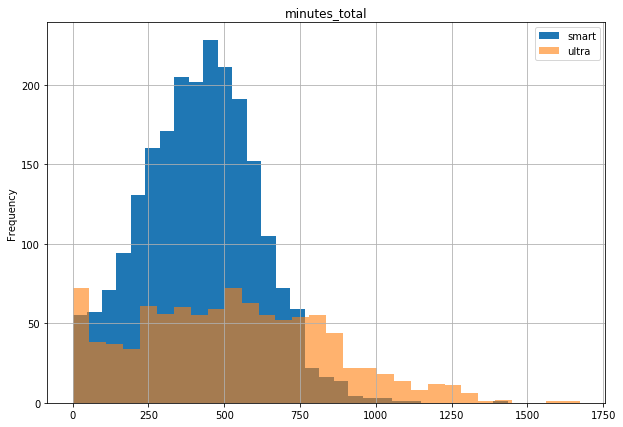

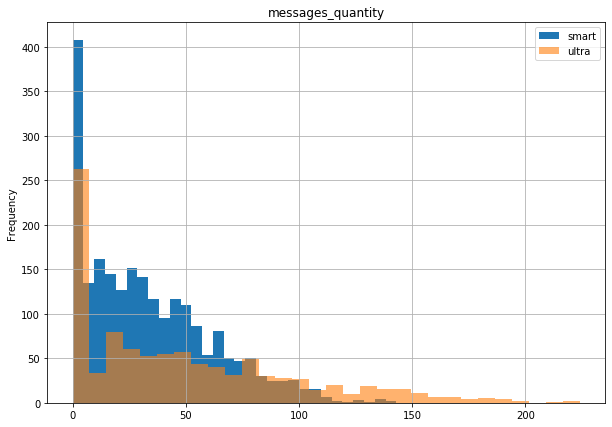

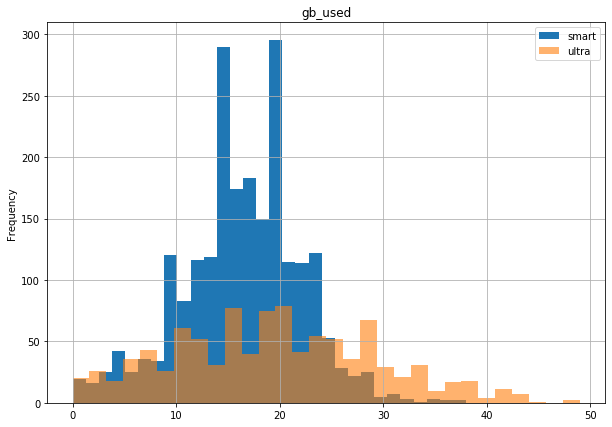

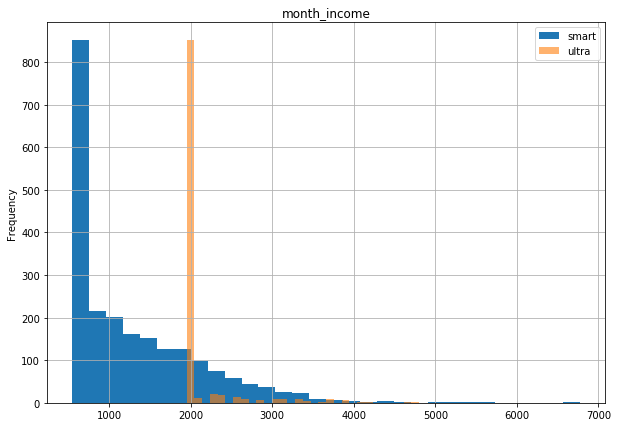

In [52]:
columns_to_research = ['minutes_total', 'messages_quantity', 'gb_used', 'month_income']
tariffs = ['smart', 'ultra']
for col in columns_to_research:
        data.loc[data.loc[:,'tariff'] == tariffs[0]][col].plot(kind = 'hist',
                                                            bins = 30,
                                                            label = 'smart', 
                                                            figsize = (10,7))
        data.loc[data.loc[:,'tariff'] == tariffs[1]][col].plot(kind = 'hist',
                                                             bins = 30,
                                                             alpha =0.6,
                                                             label = 'ultra',
                                                             figsize = (10,7))
        plt.title(col)
        plt.legend()
        plt.grid()
        plt.show()    

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круууууто! Я бы еще сетку добавил) Кстати, если тебе поднадоел стандартный `matplotlib`, попробуй пострить графики с помощью [plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html)

Графики для значений с тарифом `ultra` в большинстве скошены вправо гистограммы скошены вправо, а в тарифе smart гистограммы скошены влево.

In [53]:
# построение сводной таблицы для подсчета ключевых характеристик исследуемых столбцов
data.pivot_table(index = 'tariff', values = columns_to_research, aggfunc = ['mean', 'median', 'var', 'std']).round(2).T.style

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Огонь 🔥 Я сам обычно предлагаю студентам такое решение

Скошенность графиков подтверждают данные медианы и среднего, приведенные в сводной таблице. Пользователи тарифа `Ультра` не тратят весь базовый пакет минут и количества СМС, в отличие от тарифа `Смарт`

### Гистограмма количества потраченных минут

На тарифе `Смарт` люди разговаривают в месяц в течение 230-600 минут. Медиана равна 422, лимит по тарифу - 500 минут. Значит люди используют все включенные минуты в тариф и даже покупают добавочные.
Абоненты тарифа `Ультра` мало разговаривают по телефону (частота на графике значительно ниже, чем у абонентов `Смарт`). Среднее значение - 527 минут.
Медиана тарифа `Ультра` больше, чем медиана тарифа `Смарт`.

### Гистограмма количества отправленных СМС

Ситуация аналогична гистограмме с количеством потраченных минут. Пользователи `Смарт` чаще отправляют СМС, чем `Ультра`. Среднее значение для первой категории - 34 СМС, для второй - 50 СМС.

### Гистограмма количества потраченных гигабайт

Пользователи с тарифом `Смарт` в среднем в месяц используют от 11 до 22 Гб трафика. Медианное значение - 17, это выше количества Гб, заложенных в пакет (15 Гб). Значит пользователи тарифа регулярно докупают дополнительные гигабайты.
Пользователи с тарифом `Ультра` в среднем в месяц используют от 10 до 30 Гб трафика. Разброс значений больше. Медианное значение - 19, это ниже количества Гб, заложенного в пакет (30 Гб). К концу месяца чаще всего остаются неиспользованные Гб.

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Функция zip <a class="tocSkip"> </h3>

Функция zip создаёт итератор, который комбинирует элементы нескольких списков. Это позволяет осуществлять параллельный обход списков в циклах for или, например, выполнять параллельную сортировку.

![](https://i.ibb.co/MPPZ6TL/image.png)

### Гистограмма ежемесячного дохода

Подавляющее большинство пользователей тарифа `Ультра` платят только абонентскую плату за тариф без дополнительных расходов. А пользователям тарифа `Смарт` в основном не хватает фиксированного пакета услуг. Чтобы подсчитать общий медианный доход с пользователей каждого тарифа, надо посчитать их число и умножить на медианное значение, взятое из таблицы.  

In [54]:
# число пользователей тарифа smart
users_number_smart = (data.loc[:,'tariff'] == tariffs[0]).value_counts()[1]
print('Число пользователей тарифа smart:', users_number_smart)
# число пользователей тарифа ultra
users_number_ultra = (data.loc[:,'tariff'] == tariffs[1]).value_counts()[1]
print('Число пользователей тарифа ultra:', users_number_ultra)

# общий доход с пользователей тарифов
print('Общий доход с пользователей тарифа smart:', users_number_smart * 1023)
print('Общий доход с пользователей тарифа ultra:', users_number_smart * 1950)

Число пользователей тарифа smart: 2229
Число пользователей тарифа ultra: 985
Общий доход с пользователей тарифа smart: 2280267
Общий доход с пользователей тарифа ultra: 4346550


Пользователей тарифа `Ультра` меньше, но доход больше. Пользователей тарифа `Смарт` больше, но доход меньше. Значения различаются примерно в 2 раза.

### Вывод

Можно предположить, что тариф `Смарт` приобретают люди с низким и/или средним достатком, предполагая что сэкономят. Но при этом тратят больше за дополнительные минуты, сообщения или трафик. Тариф `Ультра` приобретают люди с более высоким достатком, берут пакеты "с запасом", при этом не расходуя их.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Хороший блок, качественно выполнен, молодец 👏

</div>

## Проверка гипотез

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [55]:
# примем критический уровень статистической значимости равным 0.05
alpha = 0.05

### Первая гипотеза

* Нулевая гипотеза (Н0): средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
* Альтернативная гипотеза (Н1) : средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Отлично, гипотезы сформулированы правильно

</div>

In [56]:
income_from_smart = data.loc[data.loc[:,'tariff'] == 'smart']['month_income']
income_from_ultra = data.loc[data.loc[:,'tariff'] == 'ultra']['month_income']
result = st.ttest_ind(income_from_smart, income_from_ultra) 
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


### Вывод

Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, отвергается

### Вторая гипотеза

* Нулевая гипотеза (Н0): средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
* Альтернативная гипотеза (Н1): средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [57]:
city_moscow = data.loc[data.loc[:,'city'] == 'Москва']['month_income']
city_other = data.loc[data.loc[:,'city'] != 'Москва']['month_income']
result_city = st.ttest_ind(city_moscow, city_other, equal_var=False)
print('p-значение:', result_city.pvalue)
if result_city.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Сами тесты выполнены корректно, молодец!

### Вывод

Гипотеза о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, не отвергается. Выручка с пользователей из Москвы аналогична выручке из регионов России.

## Общий вывод

Судя по данным, тариф `Ультра` более выгоден, но в то же время менее популярен. Компании "Мегалайн" можно дать рекомендацию по созданию некого промежуточного тарифа между `Смарт` и `Ультра`, что позволяло бы клиенту комфотнее пользоваться услугами без дополнительных плат. То есть можно включить среднее число добавочных услуг, обычно докупаемых пользователем к тарифу `Смарт`. Сумму за него тоже увеличить соразмерно стоимости итоговых услуг. При этом доход компании не уменьшится, потому что средний пользователь не будет дополнительно покупать эти включенные услуги. Также этот потенциальный тариф будет выглядеть выгодней благодаря отсутствию дополнительных затрат, а следовательно, и положительным отзывам пользователей.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Согласен с выводом

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  подсчет: количество сделанных звонков и израсходованных минут разговора по месяцам;
- [x]  подсчет: количество отправленных сообщений по месяцам;
- [x]  подсчет: объем израсходованного интернет-трафика по месяцам;
- [x]  сколько минут разговора требуется пользователям каждого тарифа в месяц, 
- [x]  сколько сообщений требуется пользователям каждого тарифа в месяц;
- [x]  какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
- [x]  подсчитано среднее количество, дисперсия и стандартное отклонение; 
- [x]  построены гистограммы, описаны распределения;
- [x]  гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- [x]  гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод